In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np
import Phys
# physical constants in cgs units
constants = Phys.ReadPhys()
import importlib
from SpecWizard_Input import ReadData

import SpecWizard_BuildInput
SpecWizard_BuildInput = importlib.reload(SpecWizard_BuildInput)
from SpecWizard_BuildInput import Build_Input

import SpecWizard_ProjectData
SpecWizard_ProjectData = importlib.reload(SpecWizard_ProjectData)
from SpecWizard_ProjectData import SightLineProjection

import SpecWizard_ComputeOpticaldepth
SpecWizard_ComputeOpticaldepth = importlib.reload(SpecWizard_ComputeOpticaldepth)
from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth
from SpecWizard_Atomfile import Atomfile

This class defines the B-spline kernel of Monaghan and Lattanzio, as used in Gadget-2


In [2]:
x_pos,y_pos,z_pos = 14.154414,9.485295 ,0 

In [3]:
BI     = Build_Input()
Wizard = BI.read_from_yml("Wizard.yml")

Warning! SightLength NOT found. Setting default value : 1


In [5]:

Wizard['sightline']['ProjectionStart'] = (x_pos/50.0,y_pos/50.0,0)
Wizard['sightline']['x-position'] = x_pos/50.0
Wizard['sightline']['y-position'] = y_pos/50.0
Wizard['sightline']['z-position'] = 0

snapshot  = ReadData(wizard = Wizard)
particles = snapshot.read_particles()  

sightlineprojection  = SightLineProjection(Wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)


Wizard['ODParams']['VoigtOff']= True
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

op_cloudy_OD_nodw = opticaldepth[('Hydrogen', 'H I')]['Optical depths']
op_urchin_OD_nodw = opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']

print(x_pos,y_pos," Total Column density Urchin: ", np.log10(opticaldepth['SimIons'][('Hydrogen',
'H I')]['TotalIonColumnDensity']['Value']))
print(x_pos,y_pos," Total Column density Sylvia Tables: ", np.log10(opticaldepth[('Hydrogen',
'H I')]['TotalIonColumnDensity']['Value']))



14.154414 9.485295  Total Column density Urchin:  20.887805005963127
14.154414 9.485295  Total Column density Sylvia Tables:  19.066562608884546


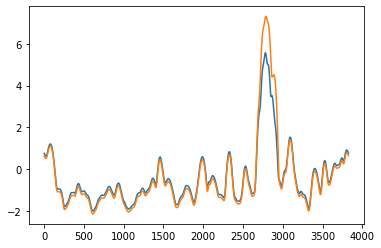

In [8]:

plt.plot(np.log10(opticaldepth[('Hydrogen', 'H I')]['Optical depths']['Value']))
plt.plot(np.log10(opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))

In [9]:
vel_arr = np.arange(projected_LOS['npix']) * projected_LOS['pixel_kms']['Value']
from SpecWizard_Lines import Lines
lines = Lines( v_kms =vel_arr, box_kms=vel_arr.max())

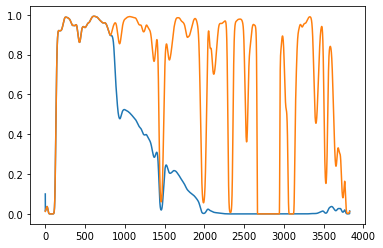

In [10]:
plt.plot(np.exp(-lines.convolvelorentz((opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))))
plt.plot(np.exp(-opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))

In [13]:
Wizard['sightline']['ProjectionExtend']["extend"]          = True
Wizard['sightline']['ProjectionExtend']["extendfactor"]    = 5


snapshot  = ReadData(wizard = Wizard)
particles = snapshot.read_particles() 

sightlineprojection  = SightLineProjection(Wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)


Wizard['ODParams']['VoigtOff']= True
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)


In [14]:
vel_arr = np.arange(projected_LOS['npix'] * Wizard['sightline']['ProjectionExtend']["extendfactor"] ) * projected_LOS['pixel_kms']['Value']
from SpecWizard_Lines import Lines
lines = Lines( v_kms =vel_arr, box_kms=vel_arr.max())

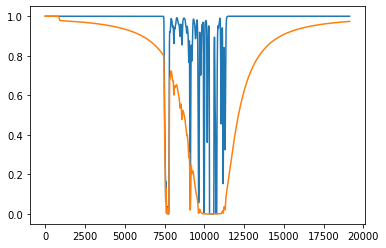

In [15]:
plt.plot(vel_arr,np.exp(-opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))
plt.plot(np.exp(-lines.convolvelorentz((opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))))